# PARTIEL: Détection et reconnaissance

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

## Question 5 

In [27]:
image_nature = cv2.imread("Nature.jpg")

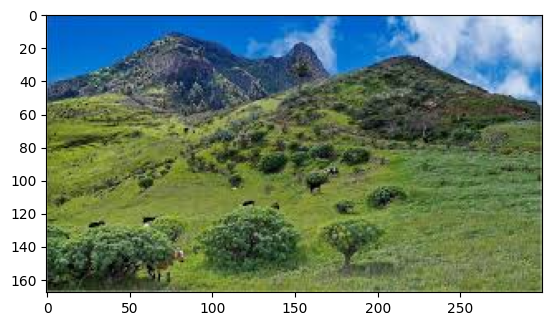

In [26]:
mask = np.array([[0,0,0],
               [0,1,0],
               [0,0,0]])
imagemask = cv2.filter2D(image_nature, -1, mask)
plt.imshow(imagemask[..., ::-1])   
plt.show()

# Exercice 1

## 1.1

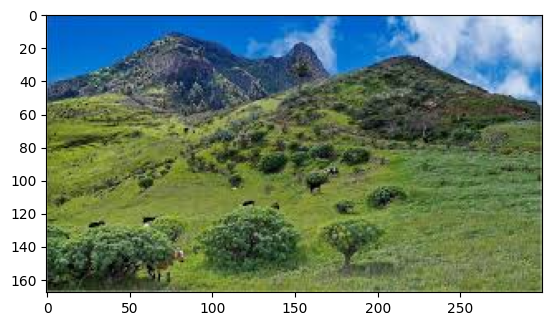

In [2]:
image_nature = cv2.imread("Nature.jpg")
plt.imshow(image_nature[..., ::-1])   
plt.show()

In [3]:
def image_couleur(image):
    b, g, r = cv2.split(image)
    img_blue = cv2.merge((b, g * 0, r * 0))
    img_green = cv2.merge((b * 0, g, r * 0))
    img_red = cv2.merge((b * 0, g * 0, r))

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.imshow(image[..., ::-1])
    plt.title("Image originale")

    plt.subplot(2, 2, 2)
    plt.imshow(img_blue[..., ::-1])
    plt.title("Image bleu")

    plt.subplot(2, 2, 3)
    plt.imshow(img_green[..., ::-1])
    plt.title("Image verte")

    plt.subplot(2, 2, 4)
    plt.imshow(img_red[..., ::-1])
    plt.title("Image rouge")

    plt.show()


## 1.2

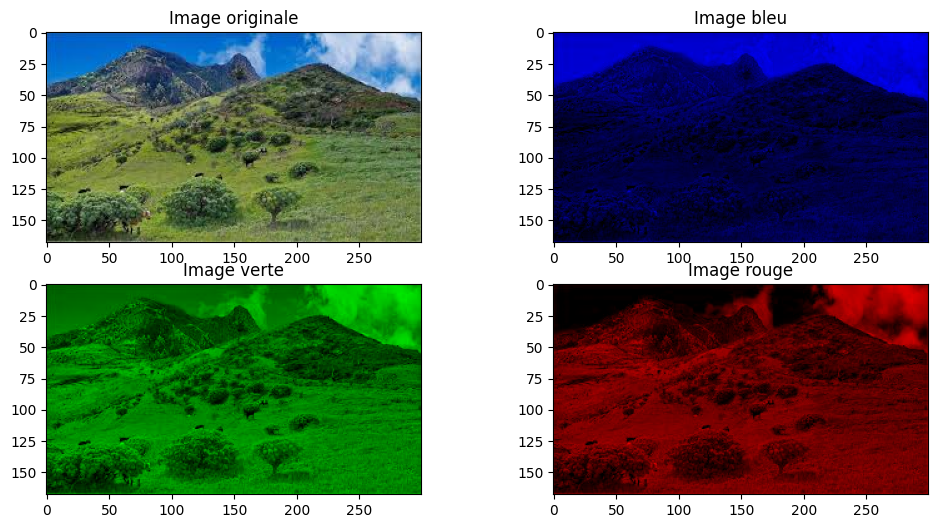

In [4]:
image_couleur(image_nature)

## 1.3

In [5]:
image_nature_quart = image_nature.copy()

In [6]:
# 1e quart => efface le rouge (1e composante du triplet RGB)
for i in range(0, image_nature_quart.shape[0]//2): 
    for j in range(0, image_nature_quart.shape[1]//2):
        image_nature_quart[i,j,0] = 0 

In [7]:
# 2nd quart => efface le vert (2e composante du triplet RGB)
for i in range(0, image_nature_quart.shape[0]//2):
    for j in range(image_nature_quart.shape[1]//2, image_nature_quart.shape[1]):
        image_nature_quart[i,j,1] = 0 

In [8]:
# 3e quart => efface le bleu (3e composante du triplet RGB)
for i in range(image_nature_quart.shape[0]//2, image_nature_quart.shape[0]):
    for j in range(0, image_nature_quart.shape[1]//2):
        image_nature_quart[i,j,2] = 0 

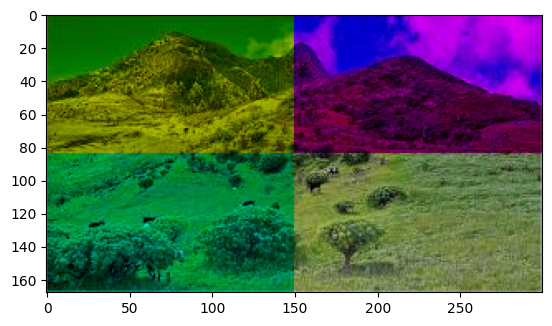

In [9]:
plt.imshow(image_nature_quart[..., ::-1])
plt.show()

### Niveau de gris

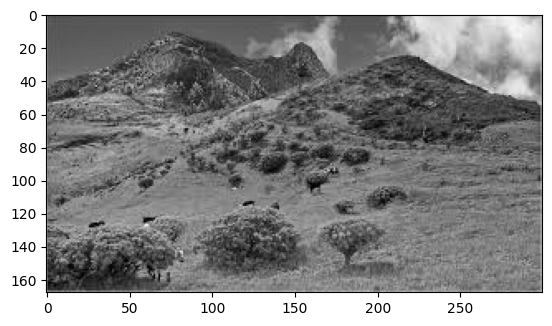

In [10]:
image_nature_gris = cv2.cvtColor(image_nature, cv2.COLOR_BGR2GRAY)
plt.imshow(image_nature_gris,cmap=plt.cm.gray)
plt.show()

In [11]:
grayscale_matrix = np.array(image_nature_gris)
grayscale_matrix

array([[167, 119, 127, ..., 168, 173, 178],
       [121,  73,  81, ..., 161, 164, 168],
       [121,  73,  81, ..., 174, 174, 175],
       ...,
       [103,  25,  36, ...,  96,  99, 138],
       [104,  42,  41, ..., 104, 114, 147],
       [152, 116, 123, ..., 149, 149, 157]], dtype=uint8)

### Niveau noir et blanc

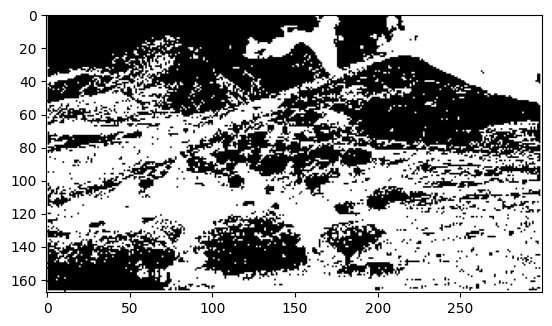

In [12]:
_, binary_image = cv2.threshold(image_nature_gris, 100, 250, cv2.THRESH_BINARY)
plt.imshow(binary_image,cmap=plt.cm.gray)
plt.show()

In [13]:
grayscale_matrix = np.array(binary_image)
grayscale_matrix

array([[250, 250, 250, ..., 250, 250, 250],
       [250,   0,   0, ..., 250, 250, 250],
       [250,   0,   0, ..., 250, 250, 250],
       ...,
       [250,   0,   0, ...,   0,   0, 250],
       [250,   0,   0, ..., 250, 250, 250],
       [250, 250, 250, ..., 250, 250, 250]], dtype=uint8)

In [14]:
# Matrice qu'avec des 0 et des 250

# Exercice 2

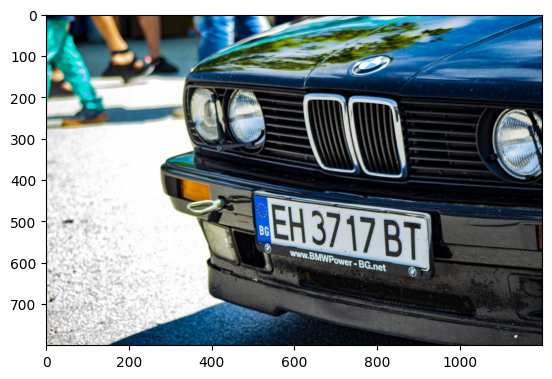

In [15]:
image_plaques = cv2.imread("plaques-dimmatriculation.png")
plt.imshow(image_plaques[..., ::-1])   
plt.show()

## 2.1

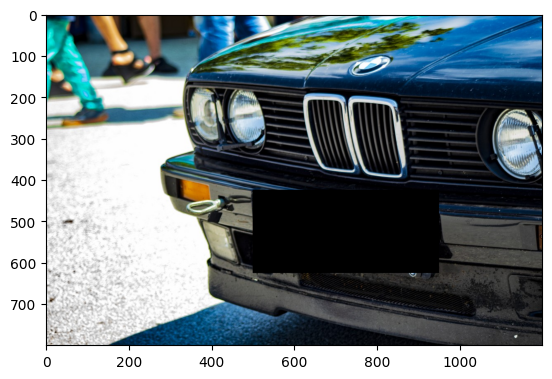

In [16]:
image_plaques_sans=cv2.rectangle(image_plaques, (500, 425), (950, 625), (0, 0, 0), -1)
plt.imshow(image_plaques_sans[..., ::-1])
plt.show()

## 2.2 

### 2.2.a

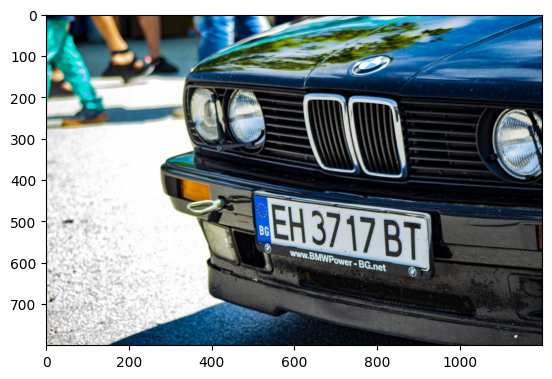

In [17]:
# Reprise de l'image pour éviter toutes erreurs par la suite
image_plaques = cv2.imread("plaques-dimmatriculation.png")
plt.imshow(image_plaques[..., ::-1])   
plt.show()

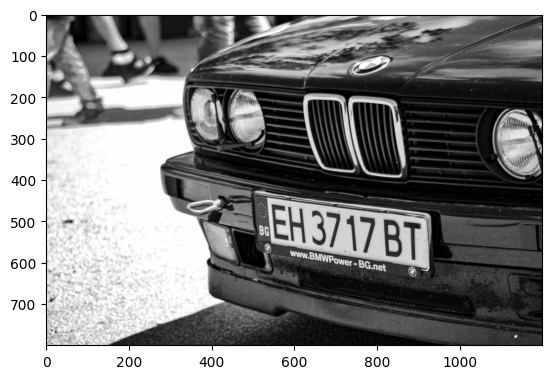

In [18]:
image_plaques_gris = cv2.cvtColor(image_plaques,cv2.COLOR_BGR2GRAY)
plt.imshow(image_plaques_gris,cmap=plt.cm.gray)
plt.show()

### 2.2.b

In [19]:
image_plaques_dx = cv2.Sobel(image_plaques_gris, cv2.CV_64F, 1, 0)

In [20]:
image_plaques_dy = cv2.Sobel(image_plaques_gris, cv2.CV_64F, 0, 1)

Text(0.5, 1.0, 'Image dérivé de y')

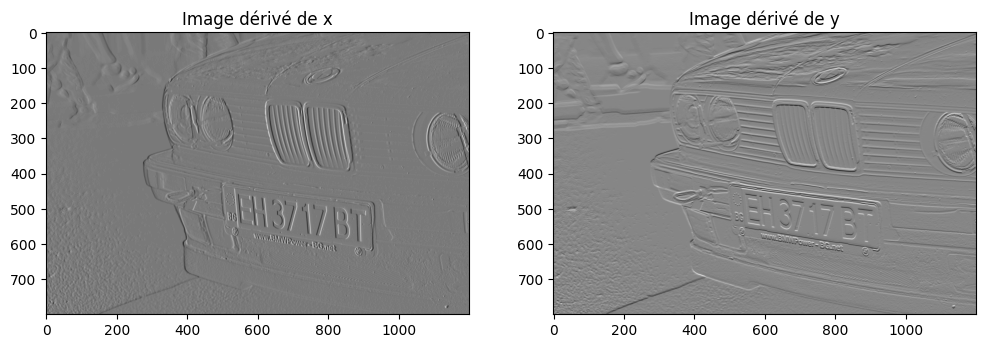

In [21]:
plt.figure(figsize=(12, 6)) 

plt.subplot(1, 2, 1)
plt.imshow(image_plaques_dx, cmap=plt.cm.gray)
plt.title("Image dérivé de x")

plt.subplot(1, 2, 2)
plt.imshow(image_plaques_dy,cmap=plt.cm.gray)
plt.title("Image dérivé de y")

### 2.2.c

In [22]:
image_plaques_flou = cv2.GaussianBlur(image_plaques_gris, (7, 7), 0)  

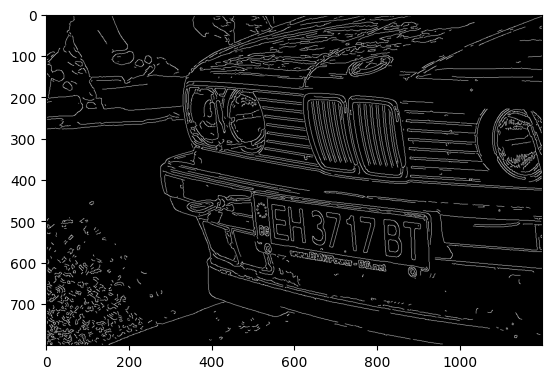

In [23]:
image_plaques_contours = cv2.Canny(image_plaques_flou, 75, 100)
plt.imshow(image_plaques_contours,cmap=plt.cm.gray)   
plt.show()

### 2.2.d

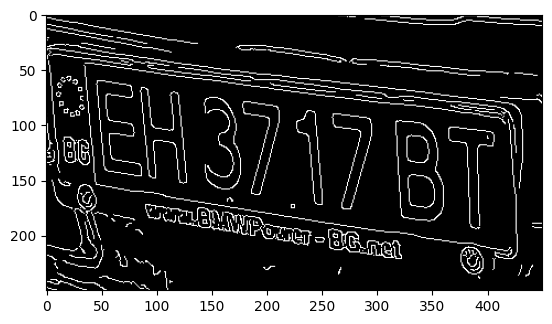

In [24]:
x, y, w, h = 400, 500, 250, 450
zoom = image_plaques_contours[x:x+w, y:y+h]
plt.imshow(zoom, cmap=plt.cm.gray)   
plt.show()